In [1]:
import pickle
import os
from tqdm import tqdm
import numpy as np

directory = 'data/train'

length_list = []
valence_values=[]

recordings = []

for filename in tqdm(os.listdir(directory)):
    if filename.endswith('.pkl'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            if data['valence'] != 2.333 and len(data['audio_data']) < 91000:
                length_list.append(len(data['audio_data']))
                valence_values.append(data['valence'])
                recordings.append(data['audio_data'])

valence_values = np.array(valence_values)
len(recordings)

100%|██████████| 10557/10557 [00:59<00:00, 177.25it/s]


10391

In [2]:
# Calculate the maximum length
max_length = max(length_list)

# Adjust the recordings to have the same length
adjusted_recordings = []
for recording in recordings:
    # Repeat the array until it reaches or exceeds the maximum length
    repeated_recording = np.tile(recording, (max_length // len(recording) + 1))[:max_length]
    adjusted_recordings.append(repeated_recording)

valence_values = np.array(valence_values)
len(adjusted_recordings), adjusted_recordings[0].shape


for i in adjusted_recordings:
    print(i.shape)

(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(

In [3]:
def round_to_nearest_quarter(number):
    # Assuming 'number' could be a numpy array with a single value
    if isinstance(number, np.ndarray) and number.size == 1:
        number = number.item()  # Convert single-item array to scalar
    
    # Ensure the number is within the 1 to 5 range before processing
    number = np.clip(number, 1, 5)
    # Scale number to shift quarters to whole numbers, round, and rescale
    rounded_number = np.round(number * 4) / 4
    # Clip again to ensure no out-of-range values after rounding
    rounded_number = np.clip(rounded_number, 1, 5)
    return str(rounded_number)

# Pre-process data

In [4]:
import torch
from torch.utils.data import TensorDataset, DataLoader


from sklearn.model_selection import train_test_split




############################################################################################################
# Pad the recordings to have the same length
max_length = max(len(array) for array in recordings)  # Find the maximum length

# # Pad each array to have the maximum length
# padded_arrays = np.array([np.pad(array, (0, max_length - len(array)), mode='constant') for array in recordings])


############################################################################################################
# Split the data and labels into training and testing sets
X_train, X_test_help, y_train, y_test_help = train_test_split(adjusted_recordings, valence_values, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test_help, y_test_help, test_size=0.5, random_state=42)



############################################################################################################
# Create a DataLoader for the training set, test set, and validation set

batch_size = 256  # You can adjust the batch size depending on your system's capability

# Convert input data and labels to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Use float32 for input features
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # Use float32 for labels

# Create a dataset from tensors
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Create a DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

############################################################################################################
# Repeat the same process for the test set

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



############################################################################################################
# Repeat the same process for the validation set
X_validation_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
y_validation_tensor = torch.tensor(y_val, dtype=torch.float32)

validation_dataset = TensorDataset(X_validation_tensor, y_validation_tensor)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)




C:\Users\20211922\AppData\Local\Temp\ipykernel_15720\315125929.py:32: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Use float32 for input features


In [5]:
train_loader.dataset.tensors[0].shape, train_loader.dataset.tensors[1].shape

(torch.Size([6234, 1, 90948]), torch.Size([6234]))

In [10]:
import torch
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torchaudio.transforms as transforms

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()



        # Set random seed for reproducibility
        torch.manual_seed(42)


        self.mfcc_transform = transforms.MFCC(
            sample_rate=44100,      ## 44.1 kHz
            n_mfcc=24              ## Created channels
        )

        self.layers = nn.ModuleList()
        
        self.layers.append(nn.BatchNorm1d(24)) #24
        conv1 = nn.Conv1d(in_channels=24, out_channels=24, kernel_size=7, padding=1) #24,48
        nn.init.kaiming_normal_(conv1.weight, nonlinearity='relu')
        self.layers.append(conv1)
        self.layers.append(nn.BatchNorm1d(24)) #48
        self.layers.append(nn.ReLU())
        self.layers.append(nn.MaxPool1d(kernel_size=3)) 
        self.layers.append(nn.Dropout(0.25))

        conv2 = nn.Conv1d(in_channels=24, out_channels=48, kernel_size=7, padding=1) #48,48
        nn.init.kaiming_normal_(conv2.weight, nonlinearity='relu')
        self.layers.append(conv2)
        self.layers.append(nn.BatchNorm1d(48)) #48
        self.layers.append(nn.ReLU())


        conv3 = nn.Conv1d(in_channels=48, out_channels=96, kernel_size=7, padding=1) #48,12
        nn.init.kaiming_normal_(conv3.weight, nonlinearity='relu')
        self.layers.append(conv3)
        self.layers.append(nn.BatchNorm1d(96)) #12
        self.layers.append(nn.ReLU())
        self.layers.append(nn.MaxPool1d(kernel_size=4)) #3
        self.layers.append(nn.Dropout(0.25))
#
        conv4 = nn.Conv1d(in_channels=96, out_channels=192, kernel_size=7, padding=1)
        nn.init.kaiming_normal_(conv4.weight, nonlinearity='relu')
        self.layers.append(conv4)
        self.layers.append(nn.BatchNorm1d(192))
        self.layers.append(nn.ReLU())

        conv5 = nn.Conv1d(in_channels=192, out_channels=192, kernel_size=7, padding=1)
        nn.init.kaiming_normal_(conv5.weight, nonlinearity='relu')
        self.layers.append(conv5)
        self.layers.append(nn.BatchNorm1d(192))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.MaxPool1d(kernel_size=5)) #3
        self.layers.append(nn.Dropout(0.25))

#
        self.layers.append(nn.Flatten())

        linear1= nn.Linear(960,256) #(564, 256)
        nn.init.kaiming_normal_(linear1.weight, nonlinearity='relu')
        self.layers.append(linear1)
        self.layers.append(nn.ReLU())
        
        linear2 = nn.Linear(256, 1)
        nn.init.kaiming_normal_(linear2.weight, nonlinearity='relu')
        self.layers.append(linear2)

# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()



#         # Set random seed for reproducibility
#         torch.manual_seed(42)


#         self.mfcc_transform = transforms.MFCC(
#             sample_rate=44100,      ## 44.1 kHz
#             n_mfcc=40              ## Created channels
#         )

#         self.layers = nn.ModuleList()
        
#         self.layers.append(nn.BatchNorm1d(40))
#         conv1 = nn.Conv1d(in_channels=40, out_channels=20, kernel_size=10, padding=1)
#         nn.init.kaiming_normal_(conv1.weight, nonlinearity='relu')
#         self.layers.append(conv1)
#         self.layers.append(nn.BatchNorm1d(20))
#         self.layers.append(nn.ReLU())
#         self.layers.append(nn.MaxPool1d(kernel_size=2))
#         self.layers.append(nn.Dropout(0.25))

#         conv2 = nn.Conv1d(in_channels=20, out_channels=20, kernel_size=10, padding=1)
#         nn.init.kaiming_normal_(conv2.weight, nonlinearity='relu')
#         self.layers.append(conv2)
#         self.layers.append(nn.BatchNorm1d(20))
#         self.layers.append(nn.ReLU())
#         self.layers.append(nn.MaxPool1d(kernel_size=2))
       
#         conv3 = nn.Conv1d(in_channels=20, out_channels=10, kernel_size=10, padding=1)
#         nn.init.kaiming_normal_(conv3.weight, nonlinearity='relu')
#         self.layers.append(conv3)
#         self.layers.append(nn.BatchNorm1d(10))
#         self.layers.append(nn.ReLU())
#         self.layers.append(nn.MaxPool1d(kernel_size=2))
#         self.layers.append(nn.Dropout(0.25))

#         self.layers.append(nn.Flatten())

#         linear1= nn.Linear(500,256)
#         nn.init.kaiming_normal_(linear1.weight, nonlinearity='relu')
#         self.layers.append(linear1)
#         self.layers.append(nn.ReLU())
        
#         linear2 = nn.Linear(256, 1)
#         nn.init.kaiming_normal_(linear2.weight, nonlinearity='relu')
#         self.layers.append(linear2)


    
    def forward(self, x):
        x = self.mfcc_transform(x)
        x = x.squeeze(1)
        for layer in self.layers:
            x = layer(x)
            #print(x.shape)
        return x.view(-1)


### CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Training Cycle

def train_model(MLP_model, optimizer, num_epochs):
        criterion = nn.MSELoss()
        #criterion = nn.L1Loss()
        # Training loop
        for epoch in tqdm(range(num_epochs)):
            total_loss = 0

            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
                outputs = MLP_model(inputs)  # Forward pass
                loss = criterion(outputs, labels)  # Compute the loss
                loss.backward()  # Backward pass

                optimizer.step()

                # Store the loss. loss.item() gets the value in a tensor. This only works for scalars.
                total_loss += loss.item()
        
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}')
            if epoch > 1:
                print(evaluate_model(MLP_model, validation_loader,conf=False))
            print('--------------------------------------------------')
        print(evaluate_model(MLP_model, train_loader,conf=True))


def evaluate_model(MLP_model, test_loader,conf=False):
    with torch.no_grad():
        ### Calculate MSE 
        predictions = []
        actuals = []
        actuals_for_cm = []
        rounded_predictions = []
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = MLP_model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())
            actuals_for_cm.extend([str(label) for label in labels.cpu().numpy()])
            rounded_predictions.extend([str(round_to_nearest_quarter(output)) for output in outputs.cpu().numpy()])

        predictions = np.array(predictions)
        actuals = np.array(actuals)
        mse = np.mean((predictions - actuals) ** 2)
        mae = np.mean(np.abs(predictions - actuals))
        print(f'Mean Squared Error: {mse:.4f} and Mean Absolute Error: {mae:.4f}')

        # for i in range(10):
        #     print(f"Predictions: {predictions[i]}")
        #     print(f"Actuals: {actuals[i]}")
        #     print(f"Rounded Predictions: {rounded_predictions[i]}")
        
        ##################
        # Confusion Matrix
        ##################
        if conf:
            ### Confusion Matrix
            cm = confusion_matrix(actuals_for_cm, rounded_predictions)
            plt.figure(figsize=(10, 8))
            sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(actuals), yticklabels=np.unique(actuals))
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix')
            plt.show()
            ### Accuracy
            accuracy = np.trace(cm) / np.sum(cm)
            print(f'Accuracy: {accuracy:.4f}')
            
        

        


  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:17<14:14, 17.44s/it]

Epoch [1/50], Loss: 10.4023
--------------------------------------------------


  4%|▍         | 2/50 [00:31<12:20, 15.42s/it]

Epoch [2/50], Loss: 1.2581
--------------------------------------------------
Epoch [3/50], Loss: 1.0285


  6%|▌         | 3/50 [00:46<11:47, 15.06s/it]

Mean Squared Error: 0.7824 and Mean Absolute Error: 0.7044
None
--------------------------------------------------
Epoch [4/50], Loss: 0.8720


  8%|▊         | 4/50 [01:00<11:25, 14.91s/it]

Mean Squared Error: 0.8440 and Mean Absolute Error: 0.7169
None
--------------------------------------------------
Epoch [5/50], Loss: 0.7539


 10%|█         | 5/50 [01:15<11:04, 14.77s/it]

Mean Squared Error: 0.7794 and Mean Absolute Error: 0.7215
None
--------------------------------------------------
Epoch [6/50], Loss: 0.7917


 12%|█▏        | 6/50 [01:29<10:48, 14.74s/it]

Mean Squared Error: 0.7067 and Mean Absolute Error: 0.6842
None
--------------------------------------------------
Epoch [7/50], Loss: 0.7075


 14%|█▍        | 7/50 [01:45<10:45, 15.00s/it]

Mean Squared Error: 0.7846 and Mean Absolute Error: 0.6934
None
--------------------------------------------------
Epoch [8/50], Loss: 0.7210


 16%|█▌        | 8/50 [01:59<10:20, 14.77s/it]

Mean Squared Error: 0.6751 and Mean Absolute Error: 0.6593
None
--------------------------------------------------
Epoch [9/50], Loss: 0.6431


 18%|█▊        | 9/50 [02:13<09:58, 14.60s/it]

Mean Squared Error: 0.6941 and Mean Absolute Error: 0.6817
None
--------------------------------------------------
Epoch [10/50], Loss: 0.6782


 20%|██        | 10/50 [02:28<09:39, 14.48s/it]

Mean Squared Error: 0.6793 and Mean Absolute Error: 0.6786
None
--------------------------------------------------
Epoch [11/50], Loss: 0.6254


 22%|██▏       | 11/50 [02:42<09:22, 14.41s/it]

Mean Squared Error: 0.6293 and Mean Absolute Error: 0.6402
None
--------------------------------------------------
Epoch [12/50], Loss: 0.6272


 24%|██▍       | 12/50 [02:56<09:05, 14.36s/it]

Mean Squared Error: 0.6696 and Mean Absolute Error: 0.6561
None
--------------------------------------------------
Epoch [13/50], Loss: 0.6152


 26%|██▌       | 13/50 [03:10<08:47, 14.26s/it]

Mean Squared Error: 0.6135 and Mean Absolute Error: 0.6356
None
--------------------------------------------------
Epoch [14/50], Loss: 0.5870


 28%|██▊       | 14/50 [03:25<08:34, 14.30s/it]

Mean Squared Error: 0.6136 and Mean Absolute Error: 0.6432
None
--------------------------------------------------
Epoch [15/50], Loss: 0.6098


 30%|███       | 15/50 [03:39<08:20, 14.30s/it]

Mean Squared Error: 0.6246 and Mean Absolute Error: 0.6460
None
--------------------------------------------------
Epoch [16/50], Loss: 0.5851


 32%|███▏      | 16/50 [03:53<08:05, 14.28s/it]

Mean Squared Error: 0.5903 and Mean Absolute Error: 0.6265
None
--------------------------------------------------
Epoch [17/50], Loss: 0.5678


 34%|███▍      | 17/50 [04:07<07:50, 14.25s/it]

Mean Squared Error: 0.6077 and Mean Absolute Error: 0.6281
None
--------------------------------------------------
Epoch [18/50], Loss: 0.5829


 36%|███▌      | 18/50 [04:22<07:35, 14.22s/it]

Mean Squared Error: 0.6130 and Mean Absolute Error: 0.6271
None
--------------------------------------------------
Epoch [19/50], Loss: 0.5573


 38%|███▊      | 19/50 [04:36<07:21, 14.24s/it]

Mean Squared Error: 0.5698 and Mean Absolute Error: 0.6122
None
--------------------------------------------------
Epoch [20/50], Loss: 0.5401


 40%|████      | 20/50 [04:50<07:06, 14.23s/it]

Mean Squared Error: 0.5698 and Mean Absolute Error: 0.6145
None
--------------------------------------------------
Epoch [21/50], Loss: 0.5635


 42%|████▏     | 21/50 [05:04<06:51, 14.19s/it]

Mean Squared Error: 0.5857 and Mean Absolute Error: 0.6288
None
--------------------------------------------------
Epoch [22/50], Loss: 0.5566


 44%|████▍     | 22/50 [05:18<06:36, 14.15s/it]

Mean Squared Error: 0.5617 and Mean Absolute Error: 0.6083
None
--------------------------------------------------
Epoch [23/50], Loss: 0.5380


 46%|████▌     | 23/50 [05:32<06:22, 14.16s/it]

Mean Squared Error: 0.5730 and Mean Absolute Error: 0.6083
None
--------------------------------------------------
Epoch [24/50], Loss: 0.5362


 48%|████▊     | 24/50 [05:47<06:08, 14.19s/it]

Mean Squared Error: 0.5810 and Mean Absolute Error: 0.6163
None
--------------------------------------------------
Epoch [25/50], Loss: 0.5437


 50%|█████     | 25/50 [06:01<05:54, 14.17s/it]

Mean Squared Error: 0.5658 and Mean Absolute Error: 0.6091
None
--------------------------------------------------
Epoch [26/50], Loss: 0.5241


 52%|█████▏    | 26/50 [06:15<05:39, 14.15s/it]

Mean Squared Error: 0.5459 and Mean Absolute Error: 0.6018
None
--------------------------------------------------
Epoch [27/50], Loss: 0.5282


 54%|█████▍    | 27/50 [06:29<05:24, 14.12s/it]

Mean Squared Error: 0.5549 and Mean Absolute Error: 0.6112
None
--------------------------------------------------
Epoch [28/50], Loss: 0.5282


 56%|█████▌    | 28/50 [06:43<05:10, 14.12s/it]

Mean Squared Error: 0.5474 and Mean Absolute Error: 0.6030
None
--------------------------------------------------
Epoch [29/50], Loss: 0.5105


 58%|█████▊    | 29/50 [06:57<04:55, 14.09s/it]

Mean Squared Error: 0.5362 and Mean Absolute Error: 0.5915
None
--------------------------------------------------
Epoch [30/50], Loss: 0.5204


 60%|██████    | 30/50 [07:11<04:41, 14.08s/it]

Mean Squared Error: 0.5681 and Mean Absolute Error: 0.6081
None
--------------------------------------------------
Epoch [31/50], Loss: 0.5230


 62%|██████▏   | 31/50 [07:25<04:27, 14.06s/it]

Mean Squared Error: 0.5520 and Mean Absolute Error: 0.6007
None
--------------------------------------------------
Epoch [32/50], Loss: 0.5079


 64%|██████▍   | 32/50 [07:39<04:12, 14.05s/it]

Mean Squared Error: 0.5254 and Mean Absolute Error: 0.5890
None
--------------------------------------------------
Epoch [33/50], Loss: 0.5046


 66%|██████▌   | 33/50 [07:53<03:58, 14.05s/it]

Mean Squared Error: 0.5328 and Mean Absolute Error: 0.5938
None
--------------------------------------------------
Epoch [34/50], Loss: 0.5109


 68%|██████▊   | 34/50 [08:07<03:45, 14.10s/it]

Mean Squared Error: 0.5366 and Mean Absolute Error: 0.5967
None
--------------------------------------------------
Epoch [35/50], Loss: 0.5068


 70%|███████   | 35/50 [08:21<03:31, 14.08s/it]

Mean Squared Error: 0.5223 and Mean Absolute Error: 0.5884
None
--------------------------------------------------
Epoch [36/50], Loss: 0.4913


 72%|███████▏  | 36/50 [08:35<03:16, 14.06s/it]

Mean Squared Error: 0.5322 and Mean Absolute Error: 0.5911
None
--------------------------------------------------
Epoch [37/50], Loss: 0.4942


 74%|███████▍  | 37/50 [08:49<03:02, 14.04s/it]

Mean Squared Error: 0.5496 and Mean Absolute Error: 0.5963
None
--------------------------------------------------
Epoch [38/50], Loss: 0.4968


 76%|███████▌  | 38/50 [09:03<02:48, 14.04s/it]

Mean Squared Error: 0.5333 and Mean Absolute Error: 0.5903
None
--------------------------------------------------
Epoch [39/50], Loss: 0.4954


 78%|███████▊  | 39/50 [09:17<02:34, 14.04s/it]

Mean Squared Error: 0.5248 and Mean Absolute Error: 0.5886
None
--------------------------------------------------
Epoch [40/50], Loss: 0.4845


 80%|████████  | 40/50 [09:31<02:20, 14.03s/it]

Mean Squared Error: 0.5166 and Mean Absolute Error: 0.5823
None
--------------------------------------------------
Epoch [41/50], Loss: 0.4908


 82%|████████▏ | 41/50 [09:46<02:06, 14.03s/it]

Mean Squared Error: 0.5186 and Mean Absolute Error: 0.5839
None
--------------------------------------------------
Epoch [42/50], Loss: 0.4888


 84%|████████▍ | 42/50 [10:00<01:52, 14.03s/it]

Mean Squared Error: 0.5255 and Mean Absolute Error: 0.5890
None
--------------------------------------------------
Epoch [43/50], Loss: 0.4781


 86%|████████▌ | 43/50 [10:14<01:38, 14.02s/it]

Mean Squared Error: 0.5311 and Mean Absolute Error: 0.5909
None
--------------------------------------------------
Epoch [44/50], Loss: 0.4772


 88%|████████▊ | 44/50 [10:28<01:24, 14.02s/it]

Mean Squared Error: 0.5332 and Mean Absolute Error: 0.5929
None
--------------------------------------------------
Epoch [45/50], Loss: 0.4793


 90%|█████████ | 45/50 [10:42<01:10, 14.01s/it]

Mean Squared Error: 0.5256 and Mean Absolute Error: 0.5867
None
--------------------------------------------------
Epoch [46/50], Loss: 0.4797


 92%|█████████▏| 46/50 [10:56<00:56, 14.10s/it]

Mean Squared Error: 0.5173 and Mean Absolute Error: 0.5827
None
--------------------------------------------------
Epoch [47/50], Loss: 0.4745


 94%|█████████▍| 47/50 [11:10<00:42, 14.21s/it]

Mean Squared Error: 0.5048 and Mean Absolute Error: 0.5744
None
--------------------------------------------------
Epoch [48/50], Loss: 0.4702


 96%|█████████▌| 48/50 [11:25<00:28, 14.24s/it]

Mean Squared Error: 0.4951 and Mean Absolute Error: 0.5715
None
--------------------------------------------------
Epoch [49/50], Loss: 0.4752


 98%|█████████▊| 49/50 [11:39<00:14, 14.27s/it]

Mean Squared Error: 0.5171 and Mean Absolute Error: 0.5804
None
--------------------------------------------------
Epoch [50/50], Loss: 0.4766


100%|██████████| 50/50 [11:54<00:00, 14.28s/it]

Mean Squared Error: 0.5150 and Mean Absolute Error: 0.5803
None
--------------------------------------------------


Mean Squared Error: 0.4713 and Mean Absolute Error: 0.5535


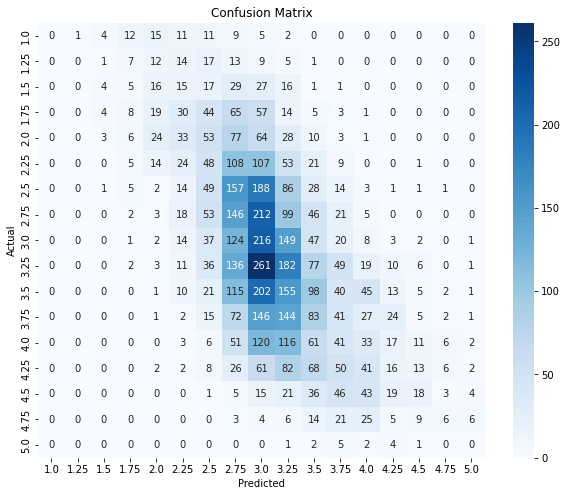

Accuracy: 0.1388
None


In [11]:
modelCNN = CNN().to(device)
optimizer = optim.Adagrad(modelCNN.parameters(), lr=0.001, weight_decay=0.0001)
train_model(modelCNN, optimizer, num_epochs=50)

Mean Squared Error: 0.5098 and Mean Absolute Error: 0.5737


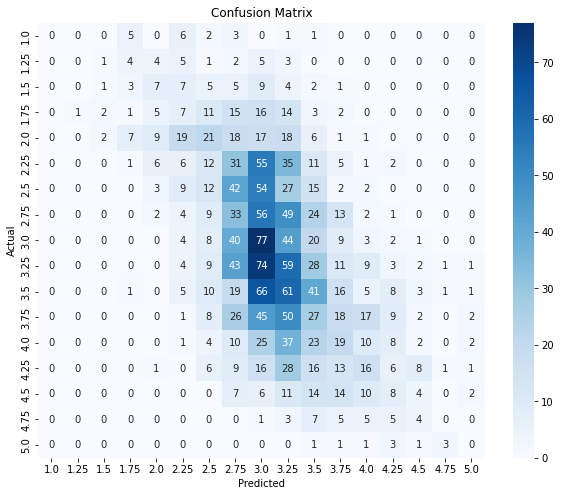

Accuracy: 0.1332


In [12]:
evaluate_model(modelCNN, test_loader,conf=True)

Mean Squared Error: 0.4162 and Mean Absolute Error: 0.5158


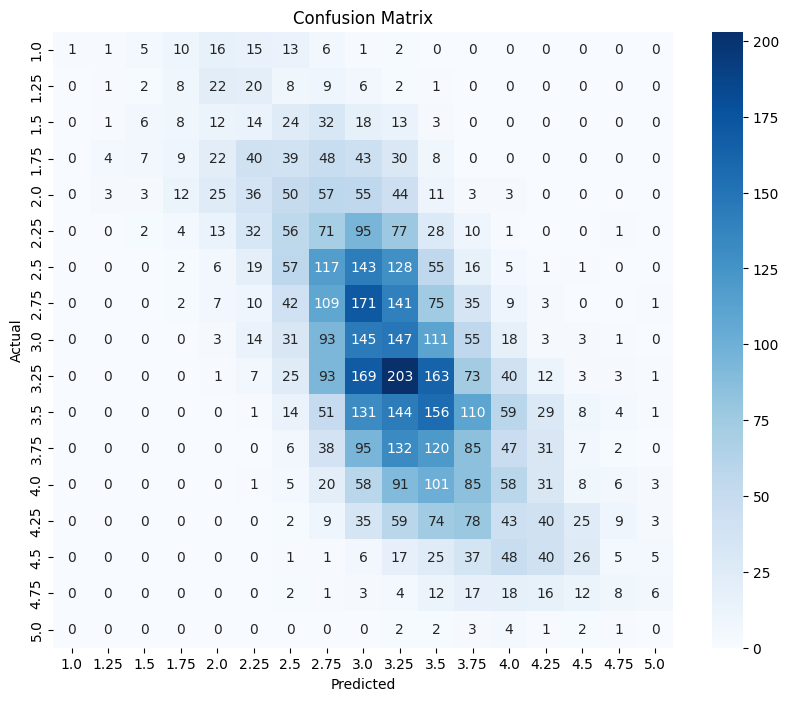

Accuracy: 0.1542


In [ ]:
evaluate_model(modelCNN, train_loader,conf=True)